In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('C:\\Users\\KXS26XY\\OneDrive - The Home Depot\\Desktop\\Data Science and Business Analytics\\Admission_Predict.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.shape

(400, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
dataset.mean()

Serial No.           200.500000
GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

In [8]:
dataset.median()
# Mean and Median values are quite close to each other which means the data is not skewed to one direction

Serial No.           200.50
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64

In [11]:
dataset['GRE Score'].mode()
# both 312 and 324 are the modes- they have the same frequency

0    312
1    324
dtype: int64

In [12]:
dataset.quantile(q=0.25)
# 25% of the data points lie below these values

Serial No.           100.75
GRE Score            308.00
TOEFL Score          103.00
University Rating      2.00
SOP                    2.50
LOR                    3.00
CGPA                   8.17
Research               0.00
Chance of Admit        0.64
Name: 0.25, dtype: float64

In [13]:
dataset.quantile(q=0.50)
# 50% of the data points lie below these value- same as the median

Serial No.           200.50
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
Name: 0.5, dtype: float64

In [14]:
dataset.quantile(q=0.75)

Serial No.           300.2500
GRE Score            325.0000
TOEFL Score          112.0000
University Rating      4.0000
SOP                    4.0000
LOR                    4.0000
CGPA                   9.0625
Research               1.0000
Chance of Admit        0.8300
Name: 0.75, dtype: float64

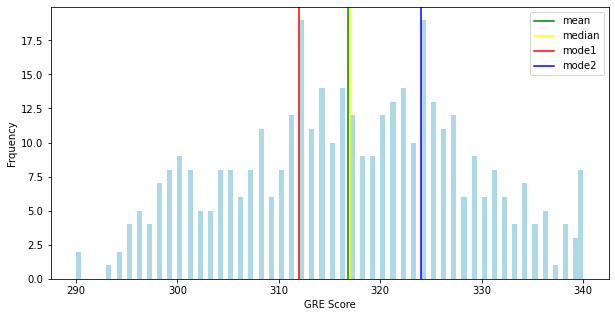

In [22]:
# Plotting the mean, median and mode using a histogram

mean = dataset['GRE Score'].mean()
median = dataset['GRE Score'].median()
mode = dataset['GRE Score'].mode()
# note that there are two modes

# print(mean, median, mode)

plt.figure(figsize=(10,5))
plt.hist(dataset['GRE Score'], bins=100, color='lightblue')
# plt.show()

plt.axvline(mean, color='green', label='mean')
plt.axvline(median, color='yellow', label='median')
plt.axvline(mode[0], color='red', label='mode1')
plt.axvline(mode[1], color='blue', label='mode2')

plt.xlabel('GRE Score')
plt.ylabel('Frquency')
plt.legend()
plt.show()


In [23]:
# Numerical description of the dataset

dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [25]:
IQR = dataset['TOEFL Score'].quantile(q=0.75) - dataset['TOEFL Score'].quantile(q=0.25)
print(IQR)

9.0


In [26]:
# Computing the IQR for each column
dataset.quantile(q=0.75) - dataset.quantile(q=0.25)

Serial No.           199.5000
GRE Score             17.0000
TOEFL Score            9.0000
University Rating      2.0000
SOP                    1.5000
LOR                    1.0000
CGPA                   0.8925
Research               1.0000
Chance of Admit        0.1900
dtype: float64

In [27]:
# Computing the range for each column
dataset.max()-dataset.min()

Serial No.           399.00
GRE Score             50.00
TOEFL Score           28.00
University Rating      4.00
SOP                    4.00
LOR                    4.00
CGPA                   3.12
Research               1.00
Chance of Admit        0.63
dtype: float64

In [28]:
# Computing the variance for all columns
dataset.var()

Serial No.           13366.666667
GRE Score              131.644555
TOEFL Score             36.838997
University Rating        1.308114
SOP                      1.013784
LOR                      0.807262
CGPA                     0.355594
Research                 0.248365
Chance of Admit          0.020337
dtype: float64

In [29]:
# Computing the standard deviation for all columns
dataset.std()

Serial No.           115.614301
GRE Score             11.473646
TOEFL Score            6.069514
University Rating      1.143728
SOP                    1.006869
LOR                    0.898478
CGPA                   0.596317
Research               0.498362
Chance of Admit        0.142609
dtype: float64

In [30]:
# Checking covariance and correlation

dataset.cov()
# The pure covariance number doesn't tell you a great deal because of the scale difference between variables

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,13366.666667,-129.369674,-103.807018,-22.472431,-19.432331,-9.164160,-3.144373,-3.637845,0.698020
GRE Score,-129.369674,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,3.318690,1.313271
TOEFL Score,-103.807018,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,1.481729,0.685179
University Rating,-22.472431,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.255232,0.116009
SOP,-19.432331,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.222807,0.097028
LOR,-9.164160,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.177701,0.085834
CGPA,-3.144373,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.155026,0.074265
Research,-3.637845,3.318690,1.481729,0.255232,0.222807,0.177701,0.155026,0.248365,0.039317
Chance of Admit,0.698020,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.039317,0.020337


In [31]:
dataset.corr()
# Correlation is a better metric because it removes the scale of the variables
# Example: covariance between GRE Score and TOEFL Score = 58 and covariance between GRE Score and University Ranking = 8
# How do you figure out which association is greater? using the correlation instead of covariance

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


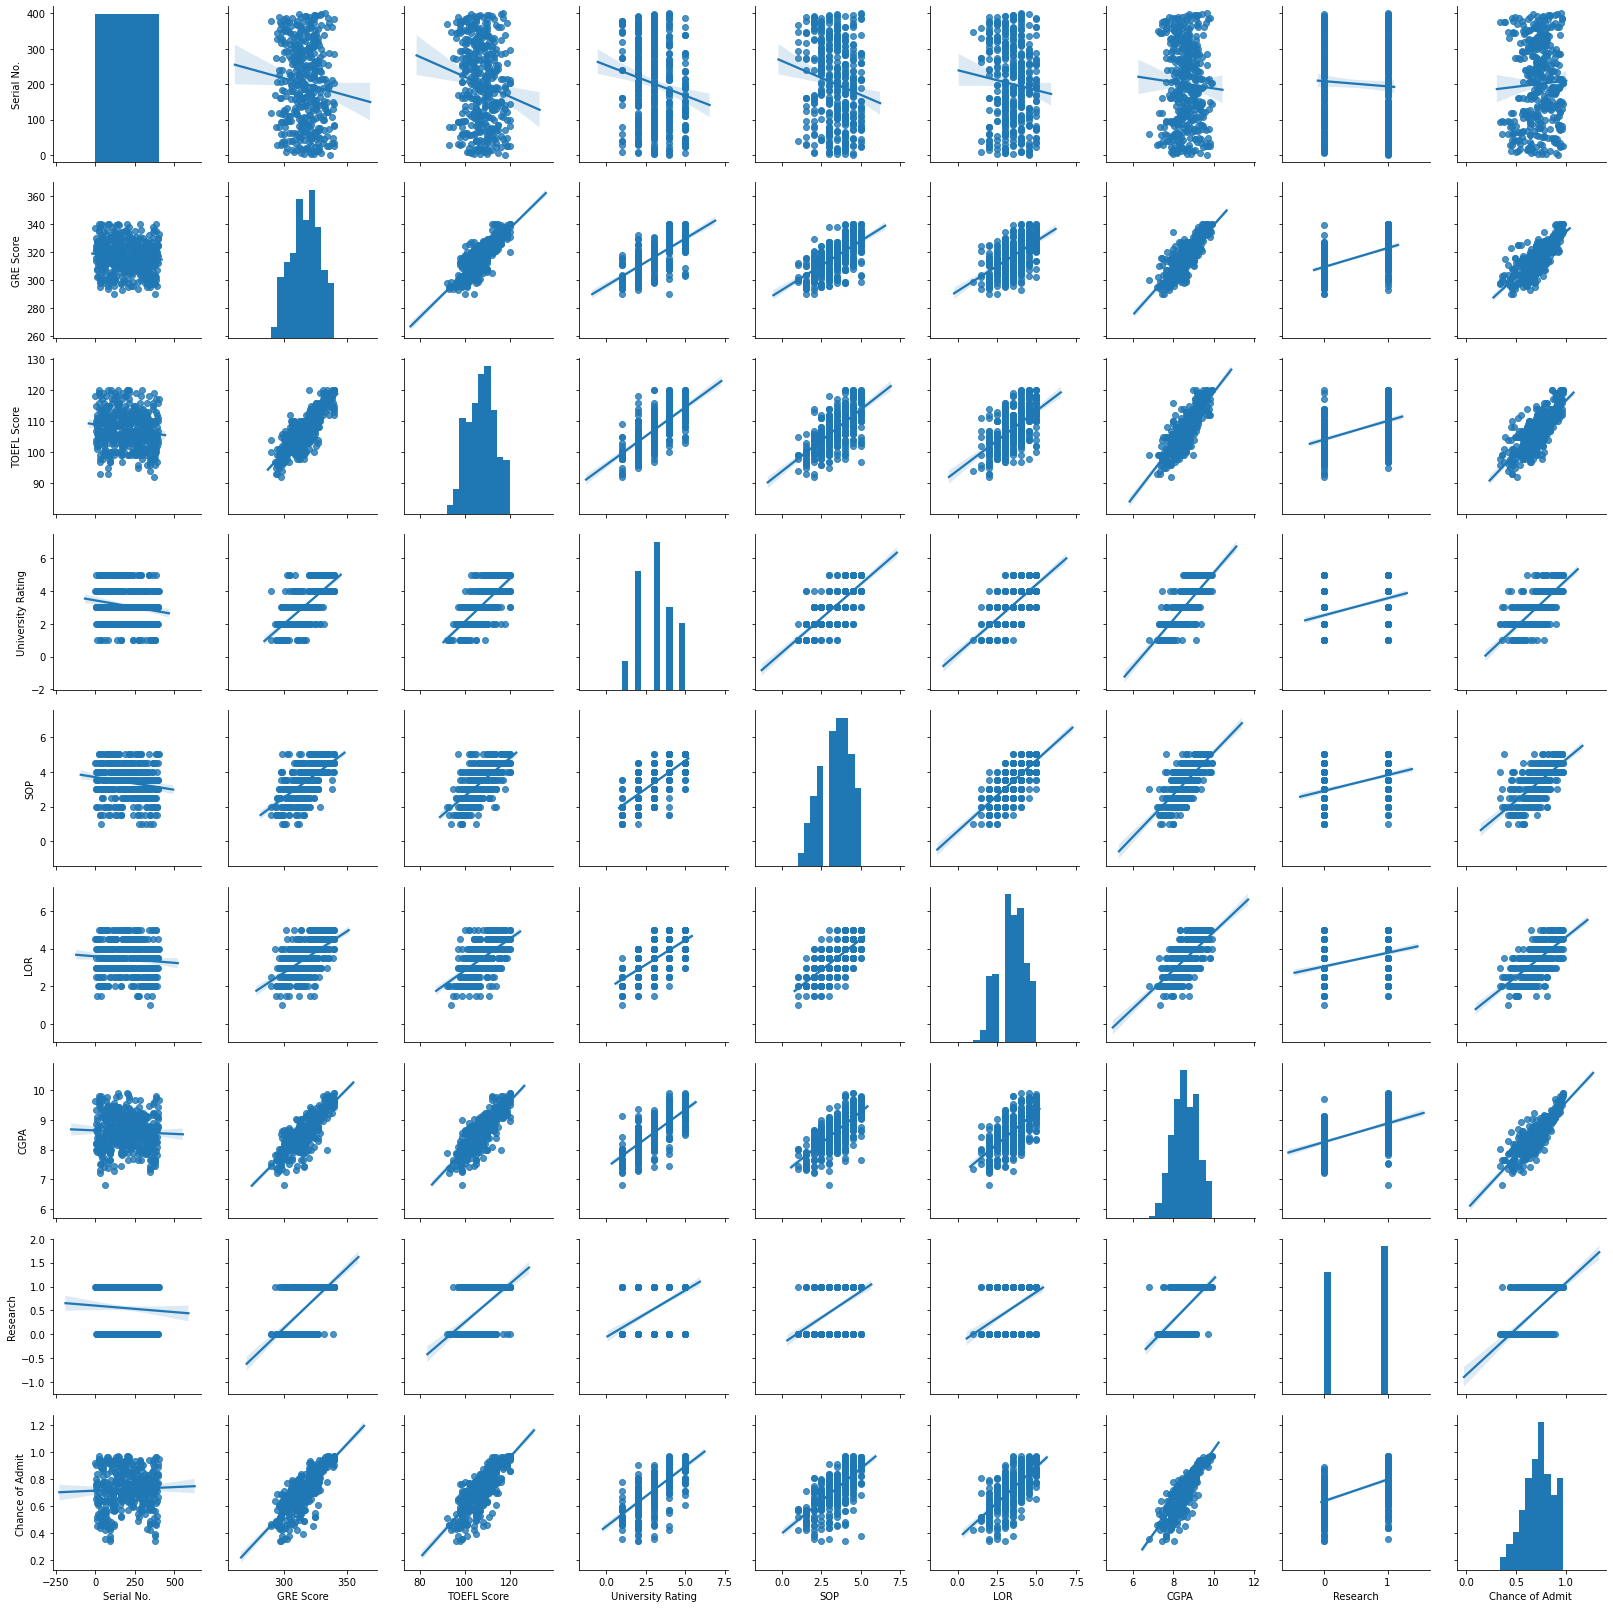

In [33]:
import seaborn as sns 

sns.pairplot(dataset, kind='reg')

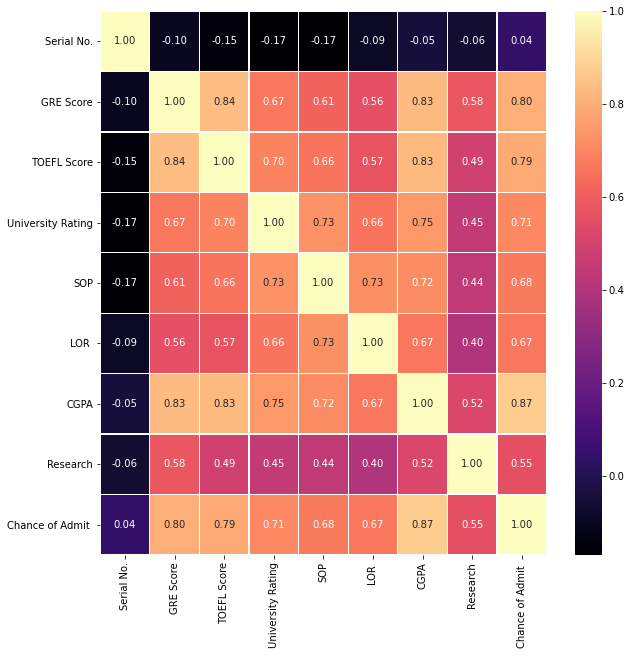

In [34]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f', cmap="magma")
plt.show()

In [35]:
dataset.skew()
# If mode < median < mean- positively skewed
# If mode > median > mean- negatively skewed

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64